# Importando bibliotecas necessárias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
%matplotlib inline

# Carregando dados

In [2]:
url='https://dadosabertos.poa.br/dataset/ca4bbd08-5200-4548-a0ae-efde50b726bb/resource/b8692b31-eae2-494e-a4de-6842698d636f/download/sinasc_nascimentos.csv'
df = pd.read_csv(url, encoding = 'cp860', sep = ';', low_memory=False)
#df = pd.read_csv('sinasc_nascimentos.csv', dtype='unicode', low_memory=False)
df.head(10)

,data_extracao,data_nascimento,escolaridade_mae,raca_mae,estado_civil_mae,nascimento_mae,cbo_mae,ocupacao,nro_consultas_prenatal,cesaria_antes_parto,...,local_nascimento,parto,trabalho_parto,apresentacao_crianca,classe_robson,peso,possui_anomalia,cid_anomalia,sexo,raca
0,2021-01-01 01:58:41.064,12/2015,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,05/1987,513210.0,COZINHEIRO DO SERVICO DOMESTICO,7 OU MAIS CONS,NaN,...,HOSPITAL,VAGINAL,INDUZIDO,CEF├üLICA,NaN,3230,N├âO,NaN,FEMININO,NaN
1,2021-01-01 01:58:41.084,12/2015,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,09/1989,516135.0,MASSAGISTA,7 OU MAIS CONS,NaN,...,HOSPITAL,VAGINAL,N├âO INDUZIDO,CEF├üLICA,NaN,3190,N├âO,NaN,MASCULINO,NaN
2,2021-01-01 01:58:41.088,12/2015,COM 12 ANOS OU MAIS,BRANCA,CASADO,10/1987,331305.0,PROFESSOR DE NIVEL MEDIO NO ENSINO PROFISSIONA...,7 OU MAIS CONS,N├âO,...,HOSPITAL,CESAREO,N├âO INDUZIDO,CEF├üLICA,NaN,3535,N├âO,NaN,FEMININO,NaN
3,2021-01-01 01:58:41.092,12/2015,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,08/1998,999992.0,DONA DE CASA,DE 4 A 6 CONS,NaN,...,HOSPITAL,VAGINAL,INDUZIDO,CEF├üLICA,NaN,3968,N├âO,NaN,MASCULINO,NaN
4,2021-01-01 01:58:41.092,12/2015,DE 4 A 7 ANOS,PRETA,SOLTEIRO,08/1997,999992.0,DONA DE CASA,7 OU MAIS CONS,SIM,...,HOSPITAL,CESAREO,N├âO INDUZIDO,CEF├üLICA,NaN,2975,N├âO,NaN,MASCULINO,NaN
5,2021-01-01 01:58:41.092,12/2015,COM 12 ANOS OU MAIS,BRANCA,UNIAO CONSENSUAL,01/1983,141615.0,GERENTE DE LOGISTICA (ARMAZENAGEM E DISTRIBUICAO),DE 4 A 6 CONS,SIM,...,HOSPITAL,CESAREO,N├âO INDUZIDO,CEF├üLICA,NaN,3025,N├âO,NaN,MASCULINO,NaN
6,2021-01-01 01:58:41.092,12/2015,DE 8 A 11 ANOS,BRANCA,CASADO,03/1984,521110.0,VENDEDOR DE COMERCIO VAREJISTA,7 OU MAIS CONS,SIM,...,HOSPITAL,CESAREO,N├âO INDUZIDO,CEF├üLICA,NaN,3645,N├âO,NaN,MASCULINO,NaN
7,2021-01-01 01:58:41.092,12/2015,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,05/1990,411010.0,ASSISTENTE ADMINISTRATIVO,7 OU MAIS CONS,N├âO,...,HOSPITAL,CESAREO,INDUZIDO,CEF├üLICA,NaN,3665,N├âO,NaN,MASCULINO,NaN
8,2021-01-01 01:58:41.096,09/2015,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,10/1986,999992.0,DONA DE CASA,7 OU MAIS CONS,SIM,...,HOSPITAL,CESAREO,N├âO INDUZIDO,CEF├üLICA,NaN,3585,N├âO,NaN,FEMININO,NaN
9,2021-01-01 01:58:41.096,09/2015,DE 8 A 11 ANOS,PARDA,CASADO,03/1989,999992.0,DONA DE CASA,7 OU MAIS CONS,SIM,...,HOSPITAL,CESAREO,N├âO INDUZIDO,P├ÊLVICA OU POD├üLICA,NaN,3540,N├âO,NaN,MASCULINO,NaN


# Exibindo as primeiras 5 linhas do dataframe

In [3]:
df.head()

,data_extracao,data_nascimento,escolaridade_mae,raca_mae,estado_civil_mae,nascimento_mae,cbo_mae,ocupacao,nro_consultas_prenatal,cesaria_antes_parto,...,local_nascimento,parto,trabalho_parto,apresentacao_crianca,classe_robson,peso,possui_anomalia,cid_anomalia,sexo,raca
0,2021-01-01 01:58:41.064,12/2015,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,05/1987,513210.0,COZINHEIRO DO SERVICO DOMESTICO,7 OU MAIS CONS,NaN,...,HOSPITAL,VAGINAL,INDUZIDO,CEF├üLICA,NaN,3230,N├âO,NaN,FEMININO,NaN
1,2021-01-01 01:58:41.084,12/2015,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,09/1989,516135.0,MASSAGISTA,7 OU MAIS CONS,NaN,...,HOSPITAL,VAGINAL,N├âO INDUZIDO,CEF├üLICA,NaN,3190,N├âO,NaN,MASCULINO,NaN
2,2021-01-01 01:58:41.088,12/2015,COM 12 ANOS OU MAIS,BRANCA,CASADO,10/1987,331305.0,PROFESSOR DE NIVEL MEDIO NO ENSINO PROFISSIONA...,7 OU MAIS CONS,N├âO,...,HOSPITAL,CESAREO,N├âO INDUZIDO,CEF├üLICA,NaN,3535,N├âO,NaN,FEMININO,NaN
3,2021-01-01 01:58:41.092,12/2015,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,08/1998,999992.0,DONA DE CASA,DE 4 A 6 CONS,NaN,...,HOSPITAL,VAGINAL,INDUZIDO,CEF├üLICA,NaN,3968,N├âO,NaN,MASCULINO,NaN
4,2021-01-01 01:58:41.092,12/2015,DE 4 A 7 ANOS,PRETA,SOLTEIRO,08/1997,999992.0,DONA DE CASA,7 OU MAIS CONS,SIM,...,HOSPITAL,CESAREO,N├âO INDUZIDO,CEF├üLICA,NaN,2975,N├âO,NaN,MASCULINO,NaN


# Análise Exploratória de Dados
### Quantidade de registros no dataframe
**182933 registros, 22 colunas**

In [4]:
print(df.shape)

(182933, 22)


## Análise básica do conteúdo

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182933 entries, 0 to 182932
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   data_extracao           182933 non-null  object 
 1   data_nascimento         182933 non-null  object 
 2   escolaridade_mae        182853 non-null  object 
 3   raca_mae                179781 non-null  object 
 4   estado_civil_mae        182872 non-null  object 
 5   nascimento_mae          179778 non-null  object 
 6   cbo_mae                 182823 non-null  float64
 7   ocupacao                182823 non-null  object 
 8   nro_consultas_prenatal  182933 non-null  object 
 9   cesaria_antes_parto     90922 non-null   object 
 10  duracao_gestacao        182824 non-null  object 
 11  gravidez                182903 non-null  object 
 12  local_nascimento        182933 non-null  object 
 13  parto                   182914 non-null  object 
 14  trabalho_parto      

### Imprimindo somente o valor da coluna peso da linha 4

In [6]:
df['peso'][4]

2975

### Procurando por linhas que atendam a condição do peso do bebê seja = 2975

In [7]:
df['peso']==2975

0         False
1         False
2         False
3         False
4          True
          ...  
182928    False
182929    False
182930    False
182931    False
182932    False
Name: peso, Length: 182933, dtype: bool

### Imprimindo linhas que atendam a condição do peso do bebê seja > 2975

In [8]:
df[df['peso']>2975]

,data_extracao,data_nascimento,escolaridade_mae,raca_mae,estado_civil_mae,nascimento_mae,cbo_mae,ocupacao,nro_consultas_prenatal,cesaria_antes_parto,...,local_nascimento,parto,trabalho_parto,apresentacao_crianca,classe_robson,peso,possui_anomalia,cid_anomalia,sexo,raca
0,2021-01-01 01:58:41.064,12/2015,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,05/1987,513210.0,COZINHEIRO DO SERVICO DOMESTICO,7 OU MAIS CONS,NaN,...,HOSPITAL,VAGINAL,INDUZIDO,CEF├üLICA,NaN,3230,N├âO,NaN,FEMININO,NaN
1,2021-01-01 01:58:41.084,12/2015,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,09/1989,516135.0,MASSAGISTA,7 OU MAIS CONS,NaN,...,HOSPITAL,VAGINAL,N├âO INDUZIDO,CEF├üLICA,NaN,3190,N├âO,NaN,MASCULINO,NaN
2,2021-01-01 01:58:41.088,12/2015,COM 12 ANOS OU MAIS,BRANCA,CASADO,10/1987,331305.0,PROFESSOR DE NIVEL MEDIO NO ENSINO PROFISSIONA...,7 OU MAIS CONS,N├âO,...,HOSPITAL,CESAREO,N├âO INDUZIDO,CEF├üLICA,NaN,3535,N├âO,NaN,FEMININO,NaN
3,2021-01-01 01:58:41.092,12/2015,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,08/1998,999992.0,DONA DE CASA,DE 4 A 6 CONS,NaN,...,HOSPITAL,VAGINAL,INDUZIDO,CEF├üLICA,NaN,3968,N├âO,NaN,MASCULINO,NaN
5,2021-01-01 01:58:41.092,12/2015,COM 12 ANOS OU MAIS,BRANCA,UNIAO CONSENSUAL,01/1983,141615.0,GERENTE DE LOGISTICA (ARMAZENAGEM E DISTRIBUICAO),DE 4 A 6 CONS,SIM,...,HOSPITAL,CESAREO,N├âO INDUZIDO,CEF├üLICA,NaN,3025,N├âO,NaN,MASCULINO,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182927,2021-01-01 01:58:50.978,12/2020,DE 8 A 11 ANOS,PRETA,SOLTEIRO,12/1999,999992.0,DONA DE CASA,7 OU MAIS CONS,NaN,...,HOSPITAL,VAGINAL,N├âO INDUZIDO,CEF├üLICA,NaN,3286,N├âO,NaN,FEMININO,NaN
182928,2021-01-01 01:58:50.978,12/2020,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,03/2000,421105.0,ATENDENTE COMERCIAL (AGENCIA POSTAL),DE 4 A 6 CONS,NaN,...,HOSPITAL,VAGINAL,INDUZIDO,CEF├üLICA,NaN,3605,N├âO,NaN,FEMININO,NaN
182929,2021-01-01 01:58:50.978,12/2020,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,10/1996,999992.0,DONA DE CASA,7 OU MAIS CONS,SIM,...,HOSPITAL,CESAREO,N├âO INDUZIDO,CEF├üLICA,NaN,3615,N├âO,NaN,MASCULINO,NaN
182930,2021-01-01 01:58:50.978,12/2020,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,09/1992,999992.0,DONA DE CASA,7 OU MAIS CONS,N├âO,...,HOSPITAL,CESAREO,N├âO INDUZIDO,CEF├üLICA,NaN,2985,N├âO,NaN,FEMININO,NaN


### Procurando por linhas que atendam a condição do parto = CESAREO

In [9]:
df['parto']=='CESAREO'

0         False
1         False
2          True
3         False
4          True
          ...  
182928    False
182929     True
182930     True
182931    False
182932    False
Name: parto, Length: 182933, dtype: bool

### Imprimindo linhas que atendam a condição que a data de nascimento da mãe seja > 01/03/1984

In [10]:
df[df['nascimento_mae']>'01/03/1984']

,data_extracao,data_nascimento,escolaridade_mae,raca_mae,estado_civil_mae,nascimento_mae,cbo_mae,ocupacao,nro_consultas_prenatal,cesaria_antes_parto,...,local_nascimento,parto,trabalho_parto,apresentacao_crianca,classe_robson,peso,possui_anomalia,cid_anomalia,sexo,raca
0,2021-01-01 01:58:41.064,12/2015,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,05/1987,513210.0,COZINHEIRO DO SERVICO DOMESTICO,7 OU MAIS CONS,NaN,...,HOSPITAL,VAGINAL,INDUZIDO,CEF├üLICA,NaN,3230,N├âO,NaN,FEMININO,NaN
1,2021-01-01 01:58:41.084,12/2015,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,09/1989,516135.0,MASSAGISTA,7 OU MAIS CONS,NaN,...,HOSPITAL,VAGINAL,N├âO INDUZIDO,CEF├üLICA,NaN,3190,N├âO,NaN,MASCULINO,NaN
2,2021-01-01 01:58:41.088,12/2015,COM 12 ANOS OU MAIS,BRANCA,CASADO,10/1987,331305.0,PROFESSOR DE NIVEL MEDIO NO ENSINO PROFISSIONA...,7 OU MAIS CONS,N├âO,...,HOSPITAL,CESAREO,N├âO INDUZIDO,CEF├üLICA,NaN,3535,N├âO,NaN,FEMININO,NaN
3,2021-01-01 01:58:41.092,12/2015,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,08/1998,999992.0,DONA DE CASA,DE 4 A 6 CONS,NaN,...,HOSPITAL,VAGINAL,INDUZIDO,CEF├üLICA,NaN,3968,N├âO,NaN,MASCULINO,NaN
4,2021-01-01 01:58:41.092,12/2015,DE 4 A 7 ANOS,PRETA,SOLTEIRO,08/1997,999992.0,DONA DE CASA,7 OU MAIS CONS,SIM,...,HOSPITAL,CESAREO,N├âO INDUZIDO,CEF├üLICA,NaN,2975,N├âO,NaN,MASCULINO,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182928,2021-01-01 01:58:50.978,12/2020,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,03/2000,421105.0,ATENDENTE COMERCIAL (AGENCIA POSTAL),DE 4 A 6 CONS,NaN,...,HOSPITAL,VAGINAL,INDUZIDO,CEF├üLICA,NaN,3605,N├âO,NaN,FEMININO,NaN
182929,2021-01-01 01:58:50.978,12/2020,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,10/1996,999992.0,DONA DE CASA,7 OU MAIS CONS,SIM,...,HOSPITAL,CESAREO,N├âO INDUZIDO,CEF├üLICA,NaN,3615,N├âO,NaN,MASCULINO,NaN
182930,2021-01-01 01:58:50.978,12/2020,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,09/1992,999992.0,DONA DE CASA,7 OU MAIS CONS,N├âO,...,HOSPITAL,CESAREO,N├âO INDUZIDO,CEF├üLICA,NaN,2985,N├âO,NaN,FEMININO,NaN
182931,2021-01-01 01:58:50.978,12/2020,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,12/1986,999992.0,DONA DE CASA,7 OU MAIS CONS,NaN,...,HOSPITAL,VAGINAL,INDUZIDO,CEF├üLICA,NaN,3304,N├âO,NaN,FEMININO,NaN


### Imprimindo linhas que atendam a condição de que a duração da gravidez seja >= 37 semanas

In [11]:
df[df['duracao_gestacao']>='DE 37 A 41 SEM']

,data_extracao,data_nascimento,escolaridade_mae,raca_mae,estado_civil_mae,nascimento_mae,cbo_mae,ocupacao,nro_consultas_prenatal,cesaria_antes_parto,...,local_nascimento,parto,trabalho_parto,apresentacao_crianca,classe_robson,peso,possui_anomalia,cid_anomalia,sexo,raca
0,2021-01-01 01:58:41.064,12/2015,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,05/1987,513210.0,COZINHEIRO DO SERVICO DOMESTICO,7 OU MAIS CONS,NaN,...,HOSPITAL,VAGINAL,INDUZIDO,CEF├üLICA,NaN,3230,N├âO,NaN,FEMININO,NaN
1,2021-01-01 01:58:41.084,12/2015,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,09/1989,516135.0,MASSAGISTA,7 OU MAIS CONS,NaN,...,HOSPITAL,VAGINAL,N├âO INDUZIDO,CEF├üLICA,NaN,3190,N├âO,NaN,MASCULINO,NaN
2,2021-01-01 01:58:41.088,12/2015,COM 12 ANOS OU MAIS,BRANCA,CASADO,10/1987,331305.0,PROFESSOR DE NIVEL MEDIO NO ENSINO PROFISSIONA...,7 OU MAIS CONS,N├âO,...,HOSPITAL,CESAREO,N├âO INDUZIDO,CEF├üLICA,NaN,3535,N├âO,NaN,FEMININO,NaN
3,2021-01-01 01:58:41.092,12/2015,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,08/1998,999992.0,DONA DE CASA,DE 4 A 6 CONS,NaN,...,HOSPITAL,VAGINAL,INDUZIDO,CEF├üLICA,NaN,3968,N├âO,NaN,MASCULINO,NaN
4,2021-01-01 01:58:41.092,12/2015,DE 4 A 7 ANOS,PRETA,SOLTEIRO,08/1997,999992.0,DONA DE CASA,7 OU MAIS CONS,SIM,...,HOSPITAL,CESAREO,N├âO INDUZIDO,CEF├üLICA,NaN,2975,N├âO,NaN,MASCULINO,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182928,2021-01-01 01:58:50.978,12/2020,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,03/2000,421105.0,ATENDENTE COMERCIAL (AGENCIA POSTAL),DE 4 A 6 CONS,NaN,...,HOSPITAL,VAGINAL,INDUZIDO,CEF├üLICA,NaN,3605,N├âO,NaN,FEMININO,NaN
182929,2021-01-01 01:58:50.978,12/2020,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,10/1996,999992.0,DONA DE CASA,7 OU MAIS CONS,SIM,...,HOSPITAL,CESAREO,N├âO INDUZIDO,CEF├üLICA,NaN,3615,N├âO,NaN,MASCULINO,NaN
182930,2021-01-01 01:58:50.978,12/2020,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,09/1992,999992.0,DONA DE CASA,7 OU MAIS CONS,N├âO,...,HOSPITAL,CESAREO,N├âO INDUZIDO,CEF├üLICA,NaN,2985,N├âO,NaN,FEMININO,NaN
182931,2021-01-01 01:58:50.978,12/2020,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,12/1986,999992.0,DONA DE CASA,7 OU MAIS CONS,NaN,...,HOSPITAL,VAGINAL,INDUZIDO,CEF├üLICA,NaN,3304,N├âO,NaN,FEMININO,NaN


### Calculando e imprimindo algumas medidas estatísticas básicas sobre a coluna peso:

In [12]:
print('Média do peso: ',df['peso'].mean())
print('Menor valor do peso: ', df['peso'].min())
print('Maior valor do peso: ', df['peso'].max())

Média do peso:  3187.3005034630164
Menor valor do peso:  0
Maior valor do peso:  6035


### Transformando a coluna duracao_gestacao em meses_gestacao

In [13]:
df['meses_gestacao'] = 0

In [14]:
df.loc[df['duracao_gestacao']=='DE 22 A 27 SEM', 'meses_gestacao']=5
df.loc[df['duracao_gestacao']=='DE 37 A 41 SEM', 'meses_gestacao']=9
df.loc[df['duracao_gestacao']=='COM 42 SEM OU MAIS', 'meses_gestacao']=9
df.loc[df['duracao_gestacao']=='DE 32 A 36 SEM', 'meses_gestacao']=8
df.loc[df['duracao_gestacao']=='DE 28 A 31 SEM', 'meses_gestacao']=7

In [15]:
df

,data_extracao,data_nascimento,escolaridade_mae,raca_mae,estado_civil_mae,nascimento_mae,cbo_mae,ocupacao,nro_consultas_prenatal,cesaria_antes_parto,...,parto,trabalho_parto,apresentacao_crianca,classe_robson,peso,possui_anomalia,cid_anomalia,sexo,raca,meses_gestacao
0,2021-01-01 01:58:41.064,12/2015,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,05/1987,513210.0,COZINHEIRO DO SERVICO DOMESTICO,7 OU MAIS CONS,NaN,...,VAGINAL,INDUZIDO,CEF├üLICA,NaN,3230,N├âO,NaN,FEMININO,NaN,9
1,2021-01-01 01:58:41.084,12/2015,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,09/1989,516135.0,MASSAGISTA,7 OU MAIS CONS,NaN,...,VAGINAL,N├âO INDUZIDO,CEF├üLICA,NaN,3190,N├âO,NaN,MASCULINO,NaN,9
2,2021-01-01 01:58:41.088,12/2015,COM 12 ANOS OU MAIS,BRANCA,CASADO,10/1987,331305.0,PROFESSOR DE NIVEL MEDIO NO ENSINO PROFISSIONA...,7 OU MAIS CONS,N├âO,...,CESAREO,N├âO INDUZIDO,CEF├üLICA,NaN,3535,N├âO,NaN,FEMININO,NaN,9
3,2021-01-01 01:58:41.092,12/2015,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,08/1998,999992.0,DONA DE CASA,DE 4 A 6 CONS,NaN,...,VAGINAL,INDUZIDO,CEF├üLICA,NaN,3968,N├âO,NaN,MASCULINO,NaN,9
4,2021-01-01 01:58:41.092,12/2015,DE 4 A 7 ANOS,PRETA,SOLTEIRO,08/1997,999992.0,DONA DE CASA,7 OU MAIS CONS,SIM,...,CESAREO,N├âO INDUZIDO,CEF├üLICA,NaN,2975,N├âO,NaN,MASCULINO,NaN,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182928,2021-01-01 01:58:50.978,12/2020,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,03/2000,421105.0,ATENDENTE COMERCIAL (AGENCIA POSTAL),DE 4 A 6 CONS,NaN,...,VAGINAL,INDUZIDO,CEF├üLICA,NaN,3605,N├âO,NaN,FEMININO,NaN,9
182929,2021-01-01 01:58:50.978,12/2020,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,10/1996,999992.0,DONA DE CASA,7 OU MAIS CONS,SIM,...,CESAREO,N├âO INDUZIDO,CEF├üLICA,NaN,3615,N├âO,NaN,MASCULINO,NaN,9
182930,2021-01-01 01:58:50.978,12/2020,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,09/1992,999992.0,DONA DE CASA,7 OU MAIS CONS,N├âO,...,CESAREO,N├âO INDUZIDO,CEF├üLICA,NaN,2985,N├âO,NaN,FEMININO,NaN,9
182931,2021-01-01 01:58:50.978,12/2020,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,12/1986,999992.0,DONA DE CASA,7 OU MAIS CONS,NaN,...,VAGINAL,INDUZIDO,CEF├üLICA,NaN,3304,N├âO,NaN,FEMININO,NaN,9


### Imprimindo linhas que atendam a condição de que a duração da gravidez seja = 5 meses

In [16]:
df[df['meses_gestacao']==5]

,data_extracao,data_nascimento,escolaridade_mae,raca_mae,estado_civil_mae,nascimento_mae,cbo_mae,ocupacao,nro_consultas_prenatal,cesaria_antes_parto,...,parto,trabalho_parto,apresentacao_crianca,classe_robson,peso,possui_anomalia,cid_anomalia,sexo,raca,meses_gestacao
14,2021-01-01 01:58:41.102,12/2015,DE 8 A 11 ANOS,PARDA,SOLTEIRO,09/2000,999991.0,ESTUDANTE,NENHUMA,NaN,...,VAGINAL,N├âO INDUZIDO,CEF├üLICA,"├ÜNICO, CEF├üLICA, <37SEM",720,N├âO,NaN,FEMININO,NaN,5
352,2021-01-01 01:58:41.094,12/2015,COM 12 ANOS OU MAIS,BRANCA,SOLTEIRO,12/1984,223305.0,MEDICO VETERINARIO,DE 1 A 3 CONS,SIM,...,CESAREO,N├âO INDUZIDO,P├ÊLVICA OU POD├üLICA,NaN,720,N├âO,NaN,MASCULINO,NaN,5
513,2021-01-01 01:58:41.157,09/2015,COM 12 ANOS OU MAIS,BRANCA,CASADO,05/1977,234505.0,PROFESSOR DE ENSINO SUPERIOR NA AREA DE DIDATICA,7 OU MAIS CONS,N├âO,...,CESAREO,N├âO INDUZIDO,TRANSVERSA,NaN,1270,N├âO,NaN,MASCULINO,NaN,5
800,2021-01-01 01:58:41.225,04/2015,COM 12 ANOS OU MAIS,BRANCA,CASADO,12/1985,241005.0,ADVOGADO,DE 1 A 3 CONS,SIM,...,CESAREO,N├âO INDUZIDO,P├ÊLVICA OU POD├üLICA,NaN,855,N├âO,NaN,FEMININO,NaN,5
1432,2021-01-01 01:58:41.227,05/2015,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,01/1977,848310.0,CONFEITEIRO,DE 4 A 6 CONS,SIM,...,CESAREO,N├âO INDUZIDO,P├ÊLVICA OU POD├üLICA,NaN,470,N├âO,NaN,FEMININO,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182374,2021-01-01 01:58:50.969,08/2020,COM 12 ANOS OU MAIS,BRANCA,SOLTEIRO,03/2001,411010.0,ASSISTENTE ADMINISTRATIVO,DE 4 A 6 CONS,SIM,...,CESAREO,N├âO INDUZIDO,CEF├üLICA,"├ÜNICO, CEF├üLICA, <37SEM",3505,N├âO,NaN,FEMININO,NaN,5
182467,2021-01-01 01:58:50.975,10/2020,COM 12 ANOS OU MAIS,BRANCA,CASADO,11/1984,111410.0,DIRIGENTE DO SERVICO PUBLICO ESTADUAL E DISTRITAL,7 OU MAIS CONS,SIM,...,CESAREO,N├âO INDUZIDO,CEF├üLICA,"├ÜNICO, CEF├üLICA, <37SEM",1080,N├âO,NaN,MASCULINO,NaN,5
182485,2021-01-01 01:58:50.975,11/2020,DE 4 A 7 ANOS,PARDA,SOLTEIRO,11/2002,999992.0,DONA DE CASA,DE 1 A 3 CONS,NaN,...,VAGINAL,N├âO INDUZIDO,P├ÊLVICA OU POD├üLICA,NaN,870,SIM,Q669,FEMININO,NaN,5
182512,2021-01-01 01:58:50.973,12/2020,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,08/1991,512105.0,EMPREGADO DOMESTICO NOS SERVICOS GERAIS,DE 4 A 6 CONS,SIM,...,CESAREO,N├âO INDUZIDO,P├ÊLVICA OU POD├üLICA,NaN,890,N├âO,NaN,MASCULINO,NaN,5


### Calculando e imprimindo algumas medidas estatísticas básicas sobre a coluna meses_gestacao:

In [17]:
print('Média dos meses de gestação: ',df['meses_gestacao'].mean())
print('Menor valor dos meses de gestação: ', df['meses_gestacao'].min())
print('Maior valor dos meses de gestação: ', df['meses_gestacao'].max())

Média dos meses de gestação:  8.849496810307599
Menor valor dos meses de gestação:  0
Maior valor dos meses de gestação:  9


### Transformando a coluna nasc_mae em idade_mae

In [18]:
df['data_nascimento'] = pd.to_datetime(df['data_nascimento'])
df['nascimento_mae'] = pd.to_datetime(df['nascimento_mae'])

In [19]:
df['idade_mae'] = df['data_nascimento'] - df['nascimento_mae']

### Tranformando a idade da mãe em um tipo inteiro

In [20]:
df['idade_mae'] = pd.to_numeric(df['idade_mae'].dt.days, downcast='integer')

### Fazendo cálculo para tranformar a idade da mãe, de dias para anos

In [21]:
df['idade_mae'] = df['idade_mae'] / 365

In [22]:
df.head()['idade_mae']

0    28.605479
1    26.265753
2    28.186301
3    17.345205
4    18.345205
Name: idade_mae, dtype: float64

### Imprimindo linhas que atendam a condição de que a idade da mãe seja >= 25 anos

In [23]:
df[df['idade_mae']>=25]

,data_extracao,data_nascimento,escolaridade_mae,raca_mae,estado_civil_mae,nascimento_mae,cbo_mae,ocupacao,nro_consultas_prenatal,cesaria_antes_parto,...,trabalho_parto,apresentacao_crianca,classe_robson,peso,possui_anomalia,cid_anomalia,sexo,raca,meses_gestacao,idade_mae
0,2021-01-01 01:58:41.064,2015-12-01,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,1987-05-01,513210.0,COZINHEIRO DO SERVICO DOMESTICO,7 OU MAIS CONS,NaN,...,INDUZIDO,CEF├üLICA,NaN,3230,N├âO,NaN,FEMININO,NaN,9,28.605479
1,2021-01-01 01:58:41.084,2015-12-01,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,1989-09-01,516135.0,MASSAGISTA,7 OU MAIS CONS,NaN,...,N├âO INDUZIDO,CEF├üLICA,NaN,3190,N├âO,NaN,MASCULINO,NaN,9,26.265753
2,2021-01-01 01:58:41.088,2015-12-01,COM 12 ANOS OU MAIS,BRANCA,CASADO,1987-10-01,331305.0,PROFESSOR DE NIVEL MEDIO NO ENSINO PROFISSIONA...,7 OU MAIS CONS,N├âO,...,N├âO INDUZIDO,CEF├üLICA,NaN,3535,N├âO,NaN,FEMININO,NaN,9,28.186301
5,2021-01-01 01:58:41.092,2015-12-01,COM 12 ANOS OU MAIS,BRANCA,UNIAO CONSENSUAL,1983-01-01,141615.0,GERENTE DE LOGISTICA (ARMAZENAGEM E DISTRIBUICAO),DE 4 A 6 CONS,SIM,...,N├âO INDUZIDO,CEF├üLICA,NaN,3025,N├âO,NaN,MASCULINO,NaN,9,32.936986
6,2021-01-01 01:58:41.092,2015-12-01,DE 8 A 11 ANOS,BRANCA,CASADO,1984-03-01,521110.0,VENDEDOR DE COMERCIO VAREJISTA,7 OU MAIS CONS,SIM,...,N├âO INDUZIDO,CEF├üLICA,NaN,3645,N├âO,NaN,MASCULINO,NaN,9,31.772603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182925,2021-01-01 01:58:50.978,2020-12-01,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,1981-10-01,512105.0,EMPREGADO DOMESTICO NOS SERVICOS GERAIS,7 OU MAIS CONS,N├âO,...,INDUZIDO,CEF├üLICA,NaN,2745,N├âO,NaN,MASCULINO,NaN,9,39.194521
182926,2021-01-01 01:58:50.978,2020-12-01,COM 12 ANOS OU MAIS,BRANCA,SOLTEIRO,1988-12-01,223405.0,FARMACEUTICO,7 OU MAIS CONS,NaN,...,N├âO INDUZIDO,CEF├üLICA,NaN,3420,N├âO,NaN,FEMININO,NaN,9,32.021918
182930,2021-01-01 01:58:50.978,2020-12-01,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,1992-09-01,999992.0,DONA DE CASA,7 OU MAIS CONS,N├âO,...,N├âO INDUZIDO,CEF├üLICA,NaN,2985,N├âO,NaN,FEMININO,NaN,9,28.268493
182931,2021-01-01 01:58:50.978,2020-12-01,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,1986-12-01,999992.0,DONA DE CASA,7 OU MAIS CONS,NaN,...,INDUZIDO,CEF├üLICA,NaN,3304,N├âO,NaN,FEMININO,NaN,9,34.024658


### Calculando e imprimindo algumas medidas estatísticas básicas sobre a coluna idade_mae:

In [24]:
print('Média de anos de idade: ',df['idade_mae'].mean())
print('Menor valor de anos de idade: ', df['idade_mae'].min())
print('Maior valor de anos de idade: ', df['idade_mae'].max())

Média de anos de idade:  28.696761241451195
Menor valor de anos de idade:  12.008219178082191
Maior valor de anos de idade:  56.28767123287671


### Transformando a coluna parto em tipo_parto:

In [25]:
df['tipo_parto'] = 0

In [26]:
df.loc[df['parto']=='CESAREO', 'tipo_parto']=1
df.loc[df['parto']=='VAGINAL', 'tipo_parto']=2

In [27]:
df

,data_extracao,data_nascimento,escolaridade_mae,raca_mae,estado_civil_mae,nascimento_mae,cbo_mae,ocupacao,nro_consultas_prenatal,cesaria_antes_parto,...,apresentacao_crianca,classe_robson,peso,possui_anomalia,cid_anomalia,sexo,raca,meses_gestacao,idade_mae,tipo_parto
0,2021-01-01 01:58:41.064,2015-12-01,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,1987-05-01,513210.0,COZINHEIRO DO SERVICO DOMESTICO,7 OU MAIS CONS,NaN,...,CEF├üLICA,NaN,3230,N├âO,NaN,FEMININO,NaN,9,28.605479,2
1,2021-01-01 01:58:41.084,2015-12-01,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,1989-09-01,516135.0,MASSAGISTA,7 OU MAIS CONS,NaN,...,CEF├üLICA,NaN,3190,N├âO,NaN,MASCULINO,NaN,9,26.265753,2
2,2021-01-01 01:58:41.088,2015-12-01,COM 12 ANOS OU MAIS,BRANCA,CASADO,1987-10-01,331305.0,PROFESSOR DE NIVEL MEDIO NO ENSINO PROFISSIONA...,7 OU MAIS CONS,N├âO,...,CEF├üLICA,NaN,3535,N├âO,NaN,FEMININO,NaN,9,28.186301,1
3,2021-01-01 01:58:41.092,2015-12-01,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,1998-08-01,999992.0,DONA DE CASA,DE 4 A 6 CONS,NaN,...,CEF├üLICA,NaN,3968,N├âO,NaN,MASCULINO,NaN,9,17.345205,2
4,2021-01-01 01:58:41.092,2015-12-01,DE 4 A 7 ANOS,PRETA,SOLTEIRO,1997-08-01,999992.0,DONA DE CASA,7 OU MAIS CONS,SIM,...,CEF├üLICA,NaN,2975,N├âO,NaN,MASCULINO,NaN,9,18.345205,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182928,2021-01-01 01:58:50.978,2020-12-01,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,2000-03-01,421105.0,ATENDENTE COMERCIAL (AGENCIA POSTAL),DE 4 A 6 CONS,NaN,...,CEF├üLICA,NaN,3605,N├âO,NaN,FEMININO,NaN,9,20.767123,2
182929,2021-01-01 01:58:50.978,2020-12-01,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,1996-10-01,999992.0,DONA DE CASA,7 OU MAIS CONS,SIM,...,CEF├üLICA,NaN,3615,N├âO,NaN,MASCULINO,NaN,9,24.183562,1
182930,2021-01-01 01:58:50.978,2020-12-01,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,1992-09-01,999992.0,DONA DE CASA,7 OU MAIS CONS,N├âO,...,CEF├üLICA,NaN,2985,N├âO,NaN,FEMININO,NaN,9,28.268493,1
182931,2021-01-01 01:58:50.978,2020-12-01,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,1986-12-01,999992.0,DONA DE CASA,7 OU MAIS CONS,NaN,...,CEF├üLICA,NaN,3304,N├âO,NaN,FEMININO,NaN,9,34.024658,2


### Transformando a coluna estado_civil_mae em tipo_estado_civil:

In [28]:
df['tipo_estado_civil'] = 0

In [29]:
df.loc[df['estado_civil_mae']=='SOLTEIRO', 'tipo_estado_civil']=1
df.loc[df['estado_civil_mae']=='CASADO', 'tipo_estado_civil']=2
df.loc[df['estado_civil_mae']=='SEPARADO JUDICIALMENTE', 'tipo_estado_civil']=4

In [30]:
df

,data_extracao,data_nascimento,escolaridade_mae,raca_mae,estado_civil_mae,nascimento_mae,cbo_mae,ocupacao,nro_consultas_prenatal,cesaria_antes_parto,...,classe_robson,peso,possui_anomalia,cid_anomalia,sexo,raca,meses_gestacao,idade_mae,tipo_parto,tipo_estado_civil
0,2021-01-01 01:58:41.064,2015-12-01,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,1987-05-01,513210.0,COZINHEIRO DO SERVICO DOMESTICO,7 OU MAIS CONS,NaN,...,NaN,3230,N├âO,NaN,FEMININO,NaN,9,28.605479,2,1
1,2021-01-01 01:58:41.084,2015-12-01,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,1989-09-01,516135.0,MASSAGISTA,7 OU MAIS CONS,NaN,...,NaN,3190,N├âO,NaN,MASCULINO,NaN,9,26.265753,2,1
2,2021-01-01 01:58:41.088,2015-12-01,COM 12 ANOS OU MAIS,BRANCA,CASADO,1987-10-01,331305.0,PROFESSOR DE NIVEL MEDIO NO ENSINO PROFISSIONA...,7 OU MAIS CONS,N├âO,...,NaN,3535,N├âO,NaN,FEMININO,NaN,9,28.186301,1,2
3,2021-01-01 01:58:41.092,2015-12-01,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,1998-08-01,999992.0,DONA DE CASA,DE 4 A 6 CONS,NaN,...,NaN,3968,N├âO,NaN,MASCULINO,NaN,9,17.345205,2,1
4,2021-01-01 01:58:41.092,2015-12-01,DE 4 A 7 ANOS,PRETA,SOLTEIRO,1997-08-01,999992.0,DONA DE CASA,7 OU MAIS CONS,SIM,...,NaN,2975,N├âO,NaN,MASCULINO,NaN,9,18.345205,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182928,2021-01-01 01:58:50.978,2020-12-01,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,2000-03-01,421105.0,ATENDENTE COMERCIAL (AGENCIA POSTAL),DE 4 A 6 CONS,NaN,...,NaN,3605,N├âO,NaN,FEMININO,NaN,9,20.767123,2,1
182929,2021-01-01 01:58:50.978,2020-12-01,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,1996-10-01,999992.0,DONA DE CASA,7 OU MAIS CONS,SIM,...,NaN,3615,N├âO,NaN,MASCULINO,NaN,9,24.183562,1,1
182930,2021-01-01 01:58:50.978,2020-12-01,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,1992-09-01,999992.0,DONA DE CASA,7 OU MAIS CONS,N├âO,...,NaN,2985,N├âO,NaN,FEMININO,NaN,9,28.268493,1,1
182931,2021-01-01 01:58:50.978,2020-12-01,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,1986-12-01,999992.0,DONA DE CASA,7 OU MAIS CONS,NaN,...,NaN,3304,N├âO,NaN,FEMININO,NaN,9,34.024658,2,1


### Transformando a coluna local_nascimento em tipo_local_nascimento:

In [31]:
df['tipo_local_nascimento'] = 0

In [32]:
df.loc[df['local_nascimento']=='HOSPITAL', 'tipo_local_nascimento']=1
df.loc[df['local_nascimento']=='DOMICILIO', 'tipo_local_nascimento']=2
df.loc[df['local_nascimento']=='OUTRO ESTAB SAUDE', 'tipo_local_nascimento']=3
df.loc[df['local_nascimento']=='OUTROS', 'tipo_local_nascimento']=4

In [33]:
df

,data_extracao,data_nascimento,escolaridade_mae,raca_mae,estado_civil_mae,nascimento_mae,cbo_mae,ocupacao,nro_consultas_prenatal,cesaria_antes_parto,...,peso,possui_anomalia,cid_anomalia,sexo,raca,meses_gestacao,idade_mae,tipo_parto,tipo_estado_civil,tipo_local_nascimento
0,2021-01-01 01:58:41.064,2015-12-01,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,1987-05-01,513210.0,COZINHEIRO DO SERVICO DOMESTICO,7 OU MAIS CONS,NaN,...,3230,N├âO,NaN,FEMININO,NaN,9,28.605479,2,1,1
1,2021-01-01 01:58:41.084,2015-12-01,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,1989-09-01,516135.0,MASSAGISTA,7 OU MAIS CONS,NaN,...,3190,N├âO,NaN,MASCULINO,NaN,9,26.265753,2,1,1
2,2021-01-01 01:58:41.088,2015-12-01,COM 12 ANOS OU MAIS,BRANCA,CASADO,1987-10-01,331305.0,PROFESSOR DE NIVEL MEDIO NO ENSINO PROFISSIONA...,7 OU MAIS CONS,N├âO,...,3535,N├âO,NaN,FEMININO,NaN,9,28.186301,1,2,1
3,2021-01-01 01:58:41.092,2015-12-01,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,1998-08-01,999992.0,DONA DE CASA,DE 4 A 6 CONS,NaN,...,3968,N├âO,NaN,MASCULINO,NaN,9,17.345205,2,1,1
4,2021-01-01 01:58:41.092,2015-12-01,DE 4 A 7 ANOS,PRETA,SOLTEIRO,1997-08-01,999992.0,DONA DE CASA,7 OU MAIS CONS,SIM,...,2975,N├âO,NaN,MASCULINO,NaN,9,18.345205,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182928,2021-01-01 01:58:50.978,2020-12-01,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,2000-03-01,421105.0,ATENDENTE COMERCIAL (AGENCIA POSTAL),DE 4 A 6 CONS,NaN,...,3605,N├âO,NaN,FEMININO,NaN,9,20.767123,2,1,1
182929,2021-01-01 01:58:50.978,2020-12-01,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,1996-10-01,999992.0,DONA DE CASA,7 OU MAIS CONS,SIM,...,3615,N├âO,NaN,MASCULINO,NaN,9,24.183562,1,1,1
182930,2021-01-01 01:58:50.978,2020-12-01,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,1992-09-01,999992.0,DONA DE CASA,7 OU MAIS CONS,N├âO,...,2985,N├âO,NaN,FEMININO,NaN,9,28.268493,1,1,1
182931,2021-01-01 01:58:50.978,2020-12-01,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,1986-12-01,999992.0,DONA DE CASA,7 OU MAIS CONS,NaN,...,3304,N├âO,NaN,FEMININO,NaN,9,34.024658,2,1,1


### Transformando a coluna gravidez em tipo_gravidez:

In [34]:
df['tipo_gravidez'] = 1

In [35]:
df.loc[df['gravidez']=='ÚNICA', 'tipo_gravidez']=1
df.loc[df['gravidez']=='DUPLA', 'tipo_gravidez']=2
df.loc[df['gravidez']=='TRIPLA OU MAIS', 'tipo_gravidez']=3

In [36]:
df

,data_extracao,data_nascimento,escolaridade_mae,raca_mae,estado_civil_mae,nascimento_mae,cbo_mae,ocupacao,nro_consultas_prenatal,cesaria_antes_parto,...,possui_anomalia,cid_anomalia,sexo,raca,meses_gestacao,idade_mae,tipo_parto,tipo_estado_civil,tipo_local_nascimento,tipo_gravidez
0,2021-01-01 01:58:41.064,2015-12-01,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,1987-05-01,513210.0,COZINHEIRO DO SERVICO DOMESTICO,7 OU MAIS CONS,NaN,...,N├âO,NaN,FEMININO,NaN,9,28.605479,2,1,1,1
1,2021-01-01 01:58:41.084,2015-12-01,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,1989-09-01,516135.0,MASSAGISTA,7 OU MAIS CONS,NaN,...,N├âO,NaN,MASCULINO,NaN,9,26.265753,2,1,1,1
2,2021-01-01 01:58:41.088,2015-12-01,COM 12 ANOS OU MAIS,BRANCA,CASADO,1987-10-01,331305.0,PROFESSOR DE NIVEL MEDIO NO ENSINO PROFISSIONA...,7 OU MAIS CONS,N├âO,...,N├âO,NaN,FEMININO,NaN,9,28.186301,1,2,1,1
3,2021-01-01 01:58:41.092,2015-12-01,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,1998-08-01,999992.0,DONA DE CASA,DE 4 A 6 CONS,NaN,...,N├âO,NaN,MASCULINO,NaN,9,17.345205,2,1,1,1
4,2021-01-01 01:58:41.092,2015-12-01,DE 4 A 7 ANOS,PRETA,SOLTEIRO,1997-08-01,999992.0,DONA DE CASA,7 OU MAIS CONS,SIM,...,N├âO,NaN,MASCULINO,NaN,9,18.345205,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182928,2021-01-01 01:58:50.978,2020-12-01,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,2000-03-01,421105.0,ATENDENTE COMERCIAL (AGENCIA POSTAL),DE 4 A 6 CONS,NaN,...,N├âO,NaN,FEMININO,NaN,9,20.767123,2,1,1,1
182929,2021-01-01 01:58:50.978,2020-12-01,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,1996-10-01,999992.0,DONA DE CASA,7 OU MAIS CONS,SIM,...,N├âO,NaN,MASCULINO,NaN,9,24.183562,1,1,1,1
182930,2021-01-01 01:58:50.978,2020-12-01,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,1992-09-01,999992.0,DONA DE CASA,7 OU MAIS CONS,N├âO,...,N├âO,NaN,FEMININO,NaN,9,28.268493,1,1,1,1
182931,2021-01-01 01:58:50.978,2020-12-01,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,1986-12-01,999992.0,DONA DE CASA,7 OU MAIS CONS,NaN,...,N├âO,NaN,FEMININO,NaN,9,34.024658,2,1,1,1


In [37]:
df[df['tipo_gravidez']==2]

,data_extracao,data_nascimento,escolaridade_mae,raca_mae,estado_civil_mae,nascimento_mae,cbo_mae,ocupacao,nro_consultas_prenatal,cesaria_antes_parto,...,possui_anomalia,cid_anomalia,sexo,raca,meses_gestacao,idade_mae,tipo_parto,tipo_estado_civil,tipo_local_nascimento,tipo_gravidez
13,2021-01-01 01:58:41.099,2015-11-01,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,1982-03-01,999992.0,DONA DE CASA,7 OU MAIS CONS,SIM,...,N├âO,NaN,FEMININO,NaN,8,33.693151,1,1,1,2
87,2021-01-01 01:58:41.120,2015-12-01,COM 12 ANOS OU MAIS,BRANCA,SOLTEIRO,1979-07-01,234305.0,PROFESSOR DE ARQUITETURA,DE 4 A 6 CONS,SIM,...,N├âO,NaN,FEMININO,NaN,9,36.443836,1,1,1,2
97,2021-01-01 01:58:41.146,2015-10-01,COM 12 ANOS OU MAIS,BRANCA,CASADO,1977-12-01,239415.0,PEDAGOGO,7 OU MAIS CONS,N├âO,...,N├âO,NaN,FEMININO,NaN,8,37.857534,1,2,1,2
181,2021-01-01 01:58:41.097,2015-08-01,COM 12 ANOS OU MAIS,BRANCA,CASADO,1985-08-01,411010.0,ASSISTENTE ADMINISTRATIVO,DE 4 A 6 CONS,SIM,...,N├âO,NaN,MASCULINO,NaN,8,30.019178,1,2,1,2
206,2021-01-01 01:58:41.137,2015-09-01,COM 12 ANOS OU MAIS,BRANCA,CASADO,1981-09-01,223505.0,ENFERMEIRO,7 OU MAIS CONS,SIM,...,N├âO,NaN,MASCULINO,NaN,9,34.021918,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182745,2021-01-01 01:58:50.970,2020-11-01,DE 8 A 11 ANOS,BRANCA,UNIAO CONSENSUAL,1993-01-01,999992.0,DONA DE CASA,7 OU MAIS CONS,SIM,...,N├âO,NaN,FEMININO,NaN,9,27.852055,1,0,1,2
182756,2021-01-01 01:58:50.973,2020-12-01,DE 4 A 7 ANOS,PARDA,CASADO,1978-03-01,512120.0,EMPREGADO DOMESTICO DIARISTA,7 OU MAIS CONS,SIM,...,N├âO,NaN,FEMININO,NaN,7,42.783562,1,2,1,2
182768,2021-01-01 01:58:50.975,2020-10-01,DE 8 A 11 ANOS,BRANCA,SOLTEIRO,1985-12-01,513430.0,COPEIRO DE HOSPITAL,DE 4 A 6 CONS,SIM,...,N├âO,NaN,FEMININO,NaN,9,34.857534,1,1,1,2
182786,2021-01-01 01:58:50.978,2020-12-01,DE 4 A 7 ANOS,BRANCA,SOLTEIRO,1999-09-01,999992.0,DONA DE CASA,7 OU MAIS CONS,SIM,...,N├âO,NaN,FEMININO,NaN,9,21.265753,1,1,1,2


### Verificando as informações das colunas que temos

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182933 entries, 0 to 182932
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   data_extracao           182933 non-null  object        
 1   data_nascimento         182933 non-null  datetime64[ns]
 2   escolaridade_mae        182853 non-null  object        
 3   raca_mae                179781 non-null  object        
 4   estado_civil_mae        182872 non-null  object        
 5   nascimento_mae          179778 non-null  datetime64[ns]
 6   cbo_mae                 182823 non-null  float64       
 7   ocupacao                182823 non-null  object        
 8   nro_consultas_prenatal  182933 non-null  object        
 9   cesaria_antes_parto     90922 non-null   object        
 10  duracao_gestacao        182824 non-null  object        
 11  gravidez                182903 non-null  object        
 12  local_nascimento        182933

### Verificando a quantidade de dados nulos que temos:

### Tratando linhas com valores faltantes:

In [39]:
df.isnull().sum()

data_extracao                  0
data_nascimento                0
escolaridade_mae              80
raca_mae                    3152
estado_civil_mae              61
nascimento_mae              3155
cbo_mae                      110
ocupacao                     110
nro_consultas_prenatal         0
cesaria_antes_parto        92011
duracao_gestacao             109
gravidez                      30
local_nascimento               0
parto                         19
trabalho_parto              3821
apresentacao_crianca        3418
classe_robson             162128
peso                           0
possui_anomalia               42
cid_anomalia              180372
sexo                          20
raca                      179881
meses_gestacao                 0
idade_mae                   3155
tipo_parto                     0
tipo_estado_civil              0
tipo_local_nascimento          0
tipo_gravidez                  0
dtype: int64

In [40]:
values= {'nascimento_mae': df.nascimento_mae.mean()}
values= {'idade_mae': df.idade_mae.mean()}
values= {'cbo_mae': df.cbo_mae.mean()}
values= {'tipo_estado_civil': df.tipo_estado_civil.mean()}
values= {'idade_mae': df.idade_mae.mean()}

In [41]:
df.fillna(value=values, inplace=True)

In [42]:
df.isnull().sum()

data_extracao                  0
data_nascimento                0
escolaridade_mae              80
raca_mae                    3152
estado_civil_mae              61
nascimento_mae              3155
cbo_mae                      110
ocupacao                     110
nro_consultas_prenatal         0
cesaria_antes_parto        92011
duracao_gestacao             109
gravidez                      30
local_nascimento               0
parto                         19
trabalho_parto              3821
apresentacao_crianca        3418
classe_robson             162128
peso                           0
possui_anomalia               42
cid_anomalia              180372
sexo                          20
raca                      179881
meses_gestacao                 0
idade_mae                      0
tipo_parto                     0
tipo_estado_civil              0
tipo_local_nascimento          0
tipo_gravidez                  0
dtype: int64

### Apagando linhas que contenham o valor de tipo_parto = 0:

In [43]:
indexNames = df[ df['tipo_parto'] == 0].index

In [44]:
df.drop(indexNames , inplace=True)

In [45]:
df[df['tipo_parto']==0]

,data_extracao,data_nascimento,escolaridade_mae,raca_mae,estado_civil_mae,nascimento_mae,cbo_mae,ocupacao,nro_consultas_prenatal,cesaria_antes_parto,...,possui_anomalia,cid_anomalia,sexo,raca,meses_gestacao,idade_mae,tipo_parto,tipo_estado_civil,tipo_local_nascimento,tipo_gravidez


In [46]:
indexNames = df[ df['meses_gestacao'] == 0].index

In [47]:
df.drop(indexNames , inplace=True)

In [48]:
df[df['meses_gestacao']==0]

,data_extracao,data_nascimento,escolaridade_mae,raca_mae,estado_civil_mae,nascimento_mae,cbo_mae,ocupacao,nro_consultas_prenatal,cesaria_antes_parto,...,possui_anomalia,cid_anomalia,sexo,raca,meses_gestacao,idade_mae,tipo_parto,tipo_estado_civil,tipo_local_nascimento,tipo_gravidez


In [49]:
df.describe()

,cbo_mae,peso,meses_gestacao,idade_mae,tipo_parto,tipo_estado_civil,tipo_local_nascimento,tipo_gravidez
count,182670.000000,182780.000000,182780.000000,182780.000000,182780.000000,182780.000000,182780.000000,182780.000000
mean,629401.346904,3188.232722,8.856664,28.696494,1.491553,1.136694,1.008694,1.028745
std,336091.902915,577.606260,0.459427,6.884661,0.499930,0.747657,0.132340,0.169914
min,0.000000,0.000000,5.000000,12.008219,1.000000,0.000000,1.000000,1.000000
25%,322205.000000,2900.000000,9.000000,23.016438,1.000000,1.000000,1.000000,1.000000
50%,516115.000000,3235.000000,9.000000,28.696761,1.000000,1.000000,1.000000,1.000000
75%,999992.000000,3550.000000,9.000000,34.106849,2.000000,2.000000,1.000000,1.000000
max,999994.000000,6035.000000,9.000000,56.287671,2.000000,4.000000,4.000000,3.000000


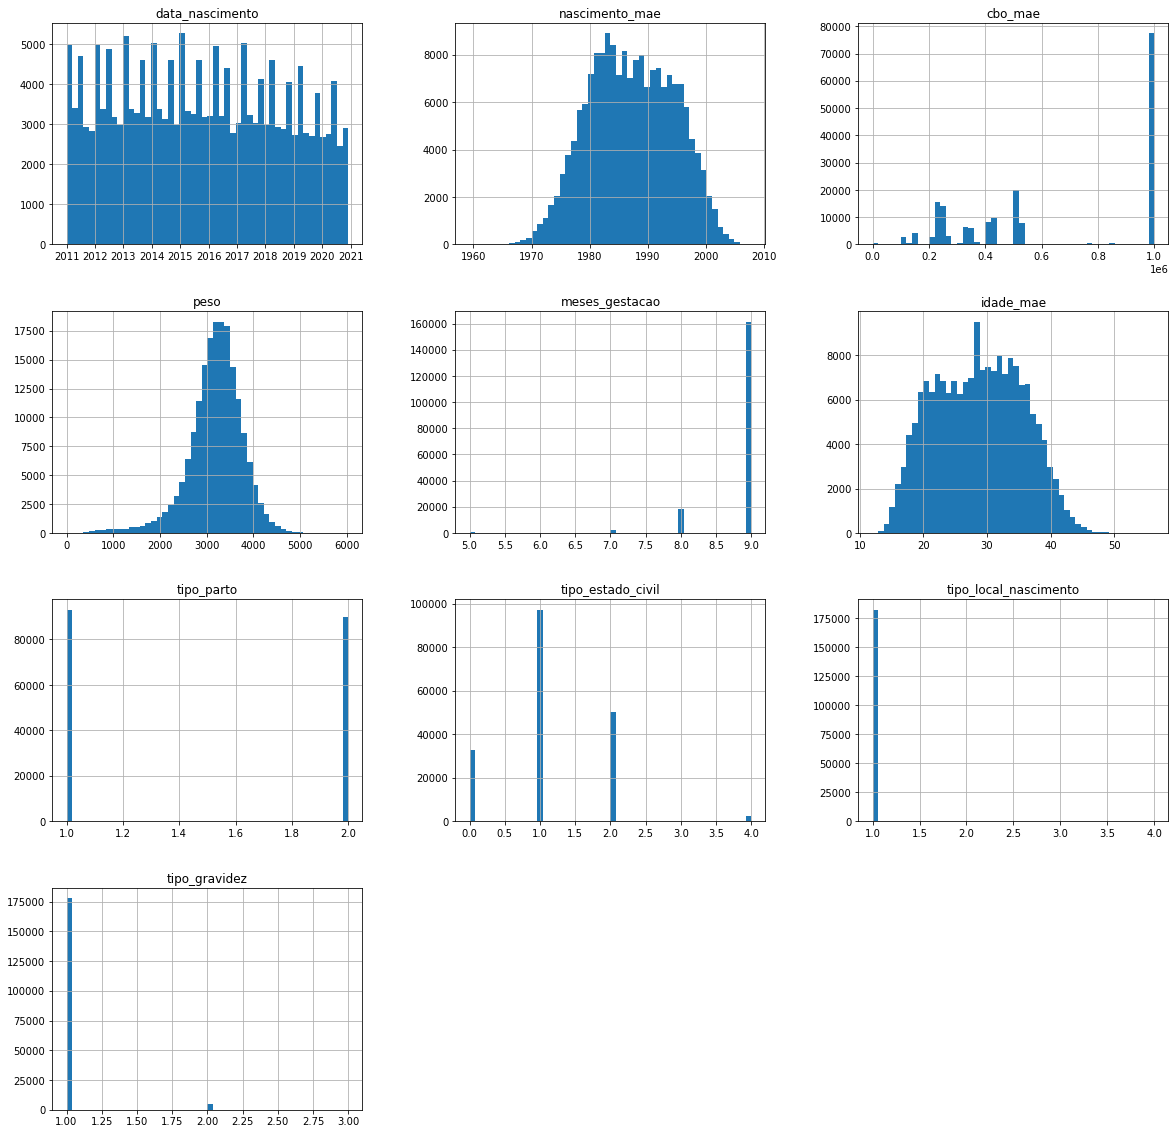

In [50]:
#Calculando e imprimindo histogramas sobre todas as colunas numéricas
df.hist(bins=50, figsize=(20,20))
plt.show()

### Gerando gráfico de peso e idade_mae:

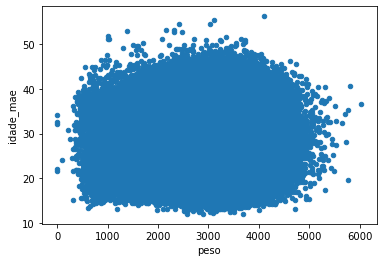

In [51]:
df.plot(x='peso', y='idade_mae', kind='scatter')
plt.show()

## Análise de correlação entre colunas
### Gráficos de dispersão comparando todas as colunas entre si:

In [52]:
feature_names = ['data_nascimento','nascimento_mae','cbo_mae','peso','meses_gestacao','idade_mae','tipo_parto','tipo_estado_civil','tipo_local_nascimento','tipo_gravidez']

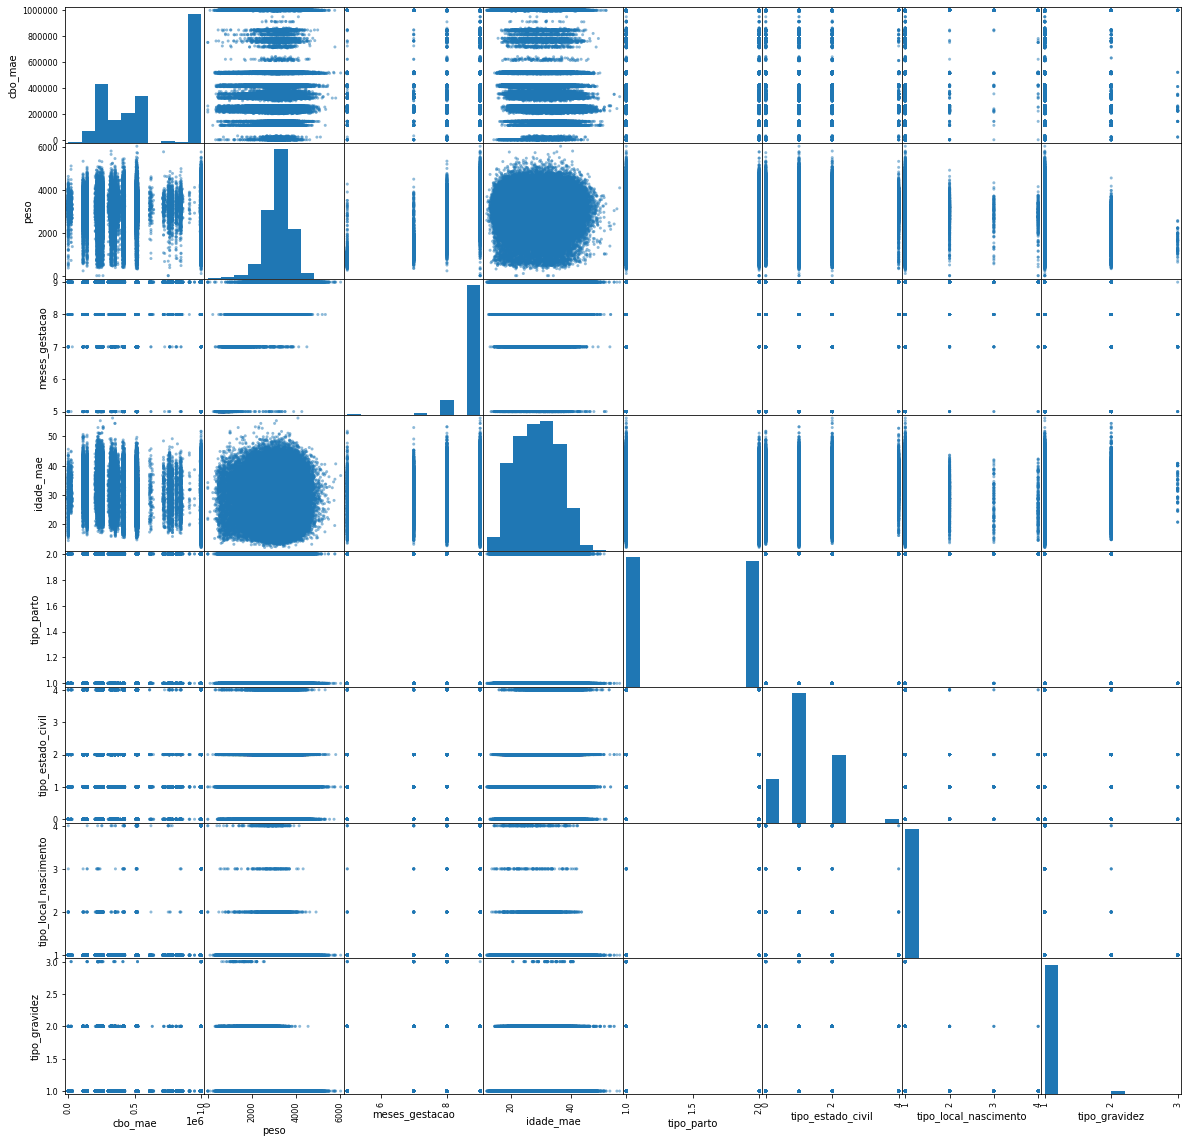

In [53]:
pd.plotting.scatter_matrix(df[feature_names],figsize=(20,20))
plt.show()

### Gerando gráfico de tipo_parto e tipo_local_nascimento:

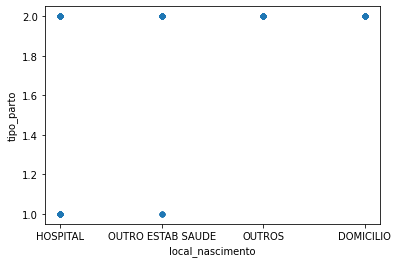

In [54]:
df.plot(x='local_nascimento', y='tipo_parto', kind='scatter')
plt.show()

### Gerando gráfico de meses_gestacao e peso:

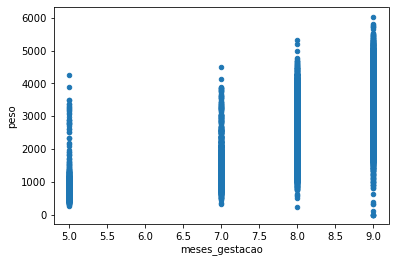

In [55]:
df.plot(x='meses_gestacao', y='peso', kind='scatter')
plt.show()

In [56]:
r, p = stats.pearsonr(df['meses_gestacao'].values, df['peso'].values)
r

0.5874593139882577

### Escolha das colunas preditivas númericas:

In [57]:
num_feature_names = ['peso','meses_gestacao','idade_mae']

### Calculando matriz de correlações entre as colunas preditivas númericas:

In [58]:
corr = np.corrcoef(df[num_feature_names],rowvar=False)
corr

array([[ 1.        ,  0.58745931, -0.00142455],
       [ 0.58745931,  1.        , -0.03112742],
       [-0.00142455, -0.03112742,  1.        ]])

### Dataframe pandas para visualização da matriz de correlações:

In [59]:
dfcorr = pd.DataFrame(corr,index=num_feature_names,columns=num_feature_names)
dfcorr

,peso,meses_gestacao,idade_mae
peso,1.000000,0.587459,-0.001425
meses_gestacao,0.587459,1.000000,-0.031127
idade_mae,-0.001425,-0.031127,1.000000


### Separando os conjuntos de treino e teste

In [60]:
from sklearn.model_selection import train_test_split


# separando os conjuntos de dados de treino e teste
df_treino, df_teste = train_test_split(df, test_size=0.2, random_state=42)

# separando a coluna alvo do conjunto de treino
df_treino_labels = df_treino['tipo_parto'].copy()
df_treino        = df_treino.drop(columns='tipo_parto')

# separando a coluna alvo do conjunto de teste
df_teste_labels = df_teste['tipo_parto'].copy()
df_teste        = df_teste.drop(columns='tipo_parto')

### Pré-processamento:

In [61]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [62]:
nomes_atributos_numericos   = ['peso', 'meses_gestacao', 'idade_mae']
nomes_atributos_categoricos = ['tipo_estado_civil','tipo_local_nascimento','tipo_gravidez']

In [63]:
pipeline_atr_numericos = Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
])

preproc_completo = ColumnTransformer([
    ('numericos',   pipeline_atr_numericos, nomes_atributos_numericos),
    ('categoricos', OneHotEncoder(),        nomes_atributos_categoricos),
    ], 
    sparse_threshold=0)

In [64]:
# pre-processamento do conjunto de treino
X_treino = preproc_completo.fit_transform(df_treino)

In [65]:
X_treino[0:2]

array([[0.19183515, 0.31061525, 0.54349967, 0.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ],
       [2.20800884, 0.31061525, 0.36081209, 0.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ]])

In [66]:
# pre-processamento do conjunto de teste
X_teste = preproc_completo.transform(df_teste)

In [67]:
X_teste[0:2]

array([[0.4512057 , 0.31061525, 0.02210376, 0.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ],
       [0.17454378, 0.31061525, 0.27683153, 0.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ]])

In [68]:
y_treino = df_treino_labels.values.reshape(-1,1)
y_teste  = df_teste_labels.values.reshape(-1,1)

### Eliminando atributos desnecessários:

In [69]:
df_treino = df_treino.drop(columns=['raca_mae','classe_robson','cid_anomalia','raca'])
df_teste  = df_teste.drop(columns=['raca_mae','classe_robson','cid_anomalia','raca'])

In [70]:
df_treino

,data_extracao,data_nascimento,escolaridade_mae,estado_civil_mae,nascimento_mae,cbo_mae,ocupacao,nro_consultas_prenatal,cesaria_antes_parto,duracao_gestacao,...,trabalho_parto,apresentacao_crianca,peso,possui_anomalia,sexo,meses_gestacao,idade_mae,tipo_estado_civil,tipo_local_nascimento,tipo_gravidez
163846,2021-01-01 01:58:49.255,2018-12-01,DE 8 A 11 ANOS,SOLTEIRO,1986-07-01,513435.0,ATENDENTE DE LANCHONETE,7 OU MAIS CONS,N├âO,DE 37 A 41 SEM,...,N├âO INDUZIDO,CEF├üLICA,3300,N├âO,MASCULINO,9,32.441096,1,1,1
118914,2021-01-01 01:58:47.455,2016-03-01,DE 4 A 7 ANOS,CASADO,1985-01-01,999992.0,DONA DE CASA,7 OU MAIS CONS,SIM,DE 37 A 41 SEM,...,N├âO INDUZIDO,CEF├üLICA,4466,N├âO,MASCULINO,9,31.183562,2,1,1
69609,2021-01-01 01:58:45.533,2012-03-01,COM 12 ANOS OU MAIS,CASADO,1974-01-01,232115.0,PROFESSOR DE DISCIPLINAS PEDAGOGICAS NO ENSINO...,7 OU MAIS CONS,N├âO,DE 37 A 41 SEM,...,INDUZIDO,CEF├üLICA,3270,N├âO,FEMININO,9,38.189041,2,1,1
18806,2021-01-01 01:58:42.350,2015-05-01,DE 8 A 11 ANOS,CASADO,1999-01-01,999991.0,ESTUDANTE,7 OU MAIS CONS,SIM,DE 37 A 41 SEM,...,INDUZIDO,CEF├üLICA,2880,N├âO,MASCULINO,9,16.339726,2,1,1
65125,2021-01-01 01:58:45.321,2013-03-01,DE 4 A 7 ANOS,SOLTEIRO,1972-09-01,516345.0,AUXILIAR DE LAVANDERIA,7 OU MAIS CONS,NaN,DE 37 A 41 SEM,...,INDUZIDO,CEF├üLICA,3005,N├âO,MASCULINO,9,40.523288,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119997,2021-01-01 01:58:47.459,2016-04-01,DE 4 A 7 ANOS,SOLTEIRO,1986-02-01,999992.0,DONA DE CASA,7 OU MAIS CONS,NaN,DE 37 A 41 SEM,...,N├âO INDUZIDO,CEF├üLICA,3104,N├âO,MASCULINO,9,30.183562,1,1,1
103805,2021-01-01 01:58:46.968,2011-01-01,COM 12 ANOS OU MAIS,CASADO,1985-04-01,999991.0,ESTUDANTE,7 OU MAIS CONS,SIM,DE 37 A 41 SEM,...,N├âO INDUZIDO,CEF├üLICA,3250,N├âO,FEMININO,9,25.769863,2,1,1
132056,2021-01-01 01:58:47.965,2018-01-01,DE 8 A 11 ANOS,CASADO,1994-07-01,521110.0,VENDEDOR DE COMERCIO VAREJISTA,7 OU MAIS CONS,NaN,DE 37 A 41 SEM,...,N├âO INDUZIDO,CEF├üLICA,3136,SIM,FEMININO,9,23.520548,2,1,1
146996,2021-01-01 01:58:48.400,2018-07-01,COM 12 ANOS OU MAIS,UNIAO CONSENSUAL,1981-05-01,252105.0,ADMINISTRADOR,7 OU MAIS CONS,SIM,DE 37 A 41 SEM,...,N├âO INDUZIDO,CEF├üLICA,2550,N├âO,FEMININO,9,37.191781,0,1,1


In [71]:
df_teste

,data_extracao,data_nascimento,escolaridade_mae,estado_civil_mae,nascimento_mae,cbo_mae,ocupacao,nro_consultas_prenatal,cesaria_antes_parto,duracao_gestacao,...,trabalho_parto,apresentacao_crianca,peso,possui_anomalia,sexo,meses_gestacao,idade_mae,tipo_estado_civil,tipo_local_nascimento,tipo_gravidez
165922,2021-01-01 01:58:49.342,2019-03-01,COM 12 ANOS OU MAIS,CASADO,1990-05-01,241005.0,ADVOGADO,7 OU MAIS CONS,SIM,DE 37 A 41 SEM,...,N├âO INDUZIDO,CEF├üLICA,3450,N├âO,MASCULINO,9,28.852055,2,1,1
147518,2021-01-01 01:58:48.468,2019-01-01,DE 8 A 11 ANOS,SOLTEIRO,1988-06-01,322205.0,TECNICO DE ENFERMAGEM,DE 4 A 6 CONS,SIM,DE 37 A 41 SEM,...,N├âO INDUZIDO,CEF├üLICA,3290,N├âO,MASCULINO,9,30.605479,1,1,1
51671,2021-01-01 01:58:44.370,2013-12-01,COM 12 ANOS OU MAIS,CASADO,1980-03-01,223208.0,CIRURGIAO DENTISTA - CLINICO GERAL,7 OU MAIS CONS,NaN,DE 37 A 41 SEM,...,N├âO INDUZIDO,CEF├üLICA,3140,N├âO,MASCULINO,9,33.775342,2,1,1
173153,2021-01-01 01:58:49.837,2018-03-01,DE 8 A 11 ANOS,SOLTEIRO,1996-06-01,999992.0,DONA DE CASA,7 OU MAIS CONS,NaN,DE 37 A 41 SEM,...,INDUZIDO,CEF├üLICA,3175,N├âO,MASCULINO,9,21.761644,1,1,1
114606,2021-01-01 01:58:47.258,2016-08-01,COM 12 ANOS OU MAIS,UNIAO CONSENSUAL,1988-02-01,223208.0,CIRURGIAO DENTISTA - CLINICO GERAL,7 OU MAIS CONS,SIM,DE 37 A 41 SEM,...,N├âO INDUZIDO,CEF├üLICA,3120,N├âO,FEMININO,9,28.517808,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18308,2021-01-01 01:58:42.242,2015-06-01,DE 4 A 7 ANOS,SOLTEIRO,1995-01-01,999992.0,DONA DE CASA,7 OU MAIS CONS,NaN,DE 37 A 41 SEM,...,N├âO INDUZIDO,CEF├üLICA,3190,N├âO,FEMININO,9,20.427397,1,1,1
7479,2021-01-01 01:58:41.811,2015-07-01,DE 8 A 11 ANOS,SOLTEIRO,1982-11-01,411010.0,ASSISTENTE ADMINISTRATIVO,7 OU MAIS CONS,SIM,DE 37 A 41 SEM,...,N├âO INDUZIDO,CEF├üLICA,2960,N├âO,FEMININO,9,32.684932,1,1,1
156987,2021-01-01 01:58:48.951,2018-10-01,COM 12 ANOS OU MAIS,SEPARADO JUDICIALMENTE,1979-08-01,333115.0,PROFESSORES DE CURSOS LIVRES,7 OU MAIS CONS,SIM,DE 37 A 41 SEM,...,N├âO INDUZIDO,P├ÊLVICA OU POD├üLICA,2640,N├âO,FEMININO,9,39.194521,4,1,1
61293,2021-01-01 01:58:44.935,2012-08-01,DE 8 A 11 ANOS,UNIAO CONSENSUAL,1993-01-01,999992.0,DONA DE CASA,7 OU MAIS CONS,SIM,DE 37 A 41 SEM,...,N├âO INDUZIDO,P├ÊLVICA OU POD├üLICA,3355,N├âO,FEMININO,9,19.594521,0,1,1


## Regressão Logística:

In [72]:
# pre-processamento da coluna alvo para regressão logística
y_treino_log = df_treino_labels.values == 1
y_teste_log = df_teste_labels.values == 1

In [73]:
y_treino_log[0:5] # resultado esperado para as primeiras 5 amostras de treino

array([ True,  True,  True,  True, False])

### Treinando e avaliando um modelo de regressão logística:

In [74]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=300)
log_reg.fit(X_treino, y_treino_log)
log_reg.classes_

array([False,  True])

### Probabilidade estimada pela regressão logística:

In [75]:
y_probabilidade_reglog = log_reg.predict_proba(X_teste)
np.round(y_probabilidade_reglog,decimals=2)

array([[0.39, 0.61],
       [0.51, 0.49],
       [0.32, 0.68],
       ...,
       [0.28, 0.72],
       [0.7 , 0.3 ],
       [0.74, 0.26]])

### Previsões estimadas pela regressão logística:

In [76]:
y_previsto_log = log_reg.predict(X_teste)
y_previsto_log

array([ True, False,  True, ...,  True, False, False])

In [77]:
y_teste

array([[1],
       [1],
       [2],
       ...,
       [1],
       [1],
       [2]], dtype=int64)

### Acurácia pela regressão logística:

In [78]:
y_teste, y_teste.shape

(array([[1],
        [1],
        [2],
        ...,
        [1],
        [1],
        [2]], dtype=int64),
 (36556, 1))

In [79]:
acertos_log = y_previsto_log == y_teste
acertos_log

array([[ True, False,  True, ...,  True, False, False],
       [ True, False,  True, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True, False,  True, ...,  True, False, False],
       [ True, False,  True, ...,  True, False, False],
       [False, False, False, ..., False, False, False]])

In [80]:
valores_log, quantidades_log = np.unique(acertos_log, return_counts=True)
print(np.asarray((valores_log, quantidades_log)))

[[        0         1]
 [995295130 341046006]]


In [81]:
## No primeiro modelo, a acurácia era de 0.45999985
## Após o tratamento de algumas colunas e linhas, o valor máximo de acurácia que conseguimos alcançar, foi de 0.64938724...

In [82]:
from sklearn.metrics import accuracy_score

print("Acurácia: ", accuracy_score(y_teste_log,y_previsto_log))

Acurácia:  0.6493872414925046


## Árvore de decisão:

In [95]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz

arvore = DecisionTreeClassifier(max_depth=2)
arvore.fit(X_treino, y_treino)
arvore.classes_

array([1, 2], dtype=int64)

### Probabilidade estimada pela árvore de decisão:

In [96]:
y_probabilidade_arvore = arvore.predict_proba(X_teste)
np.round(y_probabilidade_arvore,decimals=2)

array([[0.45, 0.55],
       [0.58, 0.42],
       [0.73, 0.27],
       ...,
       [0.58, 0.42],
       [0.32, 0.68],
       [0.32, 0.68]])

### Previsões estimadas pela árvore de decisão:

In [97]:
y_previsto_arvore = arvore.predict(X_teste)
y_previsto_arvore
##cesário é = 1 e vaginal é = 2

array([2, 1, 1, ..., 1, 2, 2], dtype=int64)

In [98]:
acertos_arvore = y_previsto_arvore == y_teste
acertos_arvore

array([[False,  True,  True, ...,  True, False, False],
       [False,  True,  True, ...,  True, False, False],
       [ True, False, False, ..., False,  True,  True],
       ...,
       [False,  True,  True, ...,  True, False, False],
       [False,  True,  True, ...,  True, False, False],
       [ True, False, False, ..., False,  True,  True]])

In [99]:
valores_arvore, quantidades_arvore = np.unique(acertos_arvore, return_counts=True)
print(np.asarray((valores_arvore, quantidades_arvore)))

[[        0         1]
 [668326568 668014568]]


In [100]:
##Uma árvore de decisão com 7 níveis, ainda ficou com a acurácia um pouco abaixo do que no modelo de regressão logística

### Acurácia pela árvore de decisão:

In [101]:
from sklearn.metrics import accuracy_score

print("Acurácia: ", accuracy_score(y_teste,y_previsto_arvore))

Acurácia:  0.6306215122004596


### Comparando as duas acurácias, por regressão logística e por árvore de decisão, com o método de regressão logística o modelo ficou um pouco melhor.

### Visualização da árvore de decisão:

In [102]:
nomes_atributos = np.append( nomes_atributos_numericos, 
                             preproc_completo.named_transformers_['categoricos'].get_feature_names())

In [106]:
#nomes_atributos=[str(x) for x in nomes_atributos_numericos] 
#list (nomes_atributos)

#list (preproc_completo.named_transformers_['categoricos'].get_feature_names())

arvore.classes_=[str(x) for x in arvore.classes_] 
list (arvore.classes_)

nomes_atributos = np.append( nomes_atributos_numericos, preproc_completo.named_transformers_['categoricos'].get_feature_names())

[Text(669.6, 543.6, 'idade_mae <= 0.022\ngini = 0.5\nsamples = 100.0%\nvalue = [0.509, 0.491]\nclass = 1'),
 Text(334.8, 326.16, 'idade_mae <= -0.729\ngini = 0.471\nsamples = 50.8%\nvalue = [0.379, 0.621]\nclass = 2'),
 Text(167.4, 108.72000000000003, 'gini = 0.433\nsamples = 27.8%\nvalue = [0.317, 0.683]\nclass = 2'),
 Text(502.20000000000005, 108.72000000000003, 'gini = 0.496\nsamples = 23.0%\nvalue = [0.454, 0.546]\nclass = 2'),
 Text(1004.4000000000001, 326.16, 'x0_2 <= 0.5\ngini = 0.459\nsamples = 49.2%\nvalue = [0.643, 0.357]\nclass = 1'),
 Text(837.0, 108.72000000000003, 'gini = 0.486\nsamples = 29.1%\nvalue = [0.583, 0.417]\nclass = 1'),
 Text(1171.8, 108.72000000000003, 'gini = 0.395\nsamples = 20.1%\nvalue = [0.729, 0.271]\nclass = 1')]

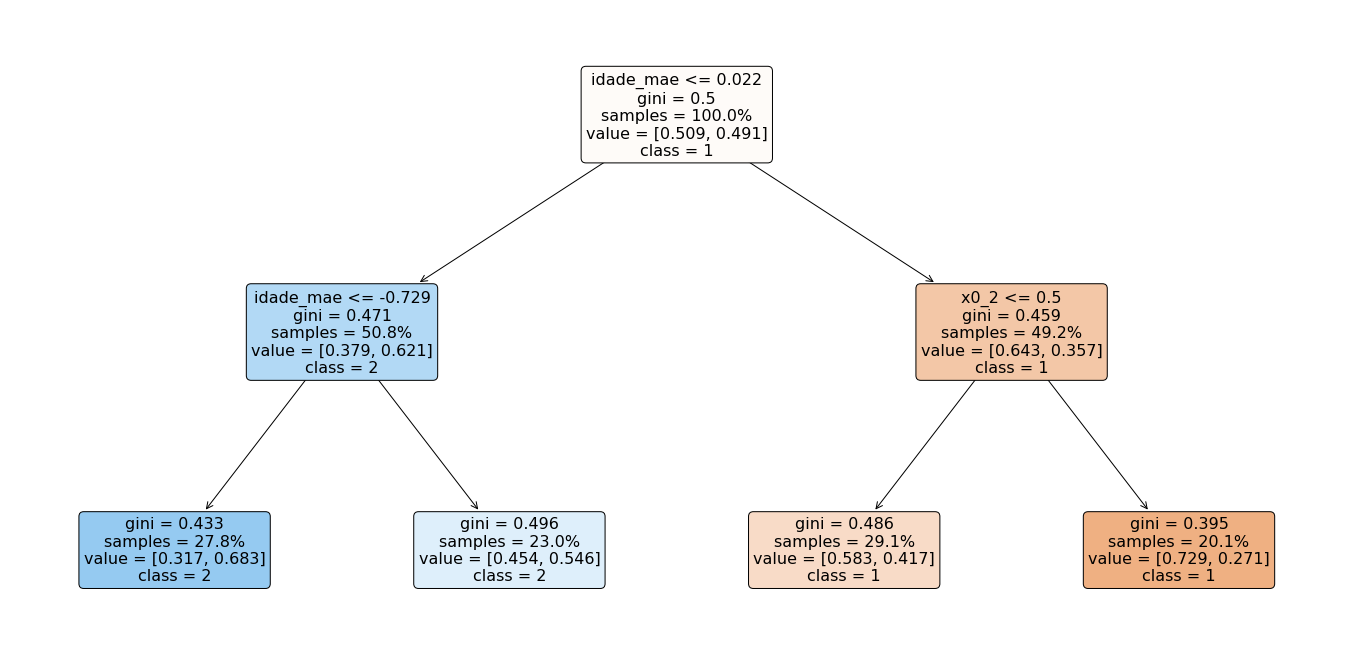

In [107]:
from sklearn import tree

plt.figure(figsize=(24,12))

tree.plot_tree(arvore,
               feature_names=nomes_atributos,
               class_names=arvore.classes_,
               rounded=True,
               filled=True,
               proportion=True,
               fontsize=16)

# Avaliação de Desempenho

## Validação cruzada:

In [108]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(arvore, X_treino, y_treino, cv=5)

print("Acurácia  por    particionamento: ",scores)
print("Acurácia média..................: ",scores.mean())

Acurácia  por    particionamento:  [0.63156095 0.63169773 0.63234741 0.63255257 0.6298044 ]
Acurácia média..................:  0.6315926127844371


## Otimização os hiper-parâmetros:

In [109]:
from sklearn.model_selection import GridSearchCV

param_grid = [
 {'max_depth':        [1,2,3,4,5,6,7,8,9,10],
  'min_samples_leaf': [2,3,4,5]
 }]

grid_search = GridSearchCV(arvore, param_grid)
grid_search.fit(X_treino, y_treino)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=2),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'min_samples_leaf': [2, 3, 4, 5]}])

In [110]:
grid_search.best_params_

{'max_depth': 8, 'min_samples_leaf': 2}

In [111]:
y_previsto_melhor_arvore = grid_search.best_estimator_.predict(X_teste)
print("Acurácia da melhor árvore: ", accuracy_score(y_teste,y_previsto_melhor_arvore))

Acurácia da melhor árvore:  0.6490863332968596


### Acurácia por um previsor ignorante:

In [112]:
from sklearn.base import BaseEstimator

# implementando um previsor que sempre chuta na classe False, ignorando os valores em X
class PrevisorIgnorante(BaseEstimator):
    def fit(self, X, y=None):
        pass                                    # ou seja, não faz nada para aprender no método fit
    def predict(self, X):
        return np.zeros((len(X),), dtype=bool)  # ou seja, devolve um vetor de previsões "False", 
                                                # ignorando os valores dos atributos preditivos.

# treinando
ignorante = PrevisorIgnorante()
ignorante.fit(X_treino, y_treino)

In [113]:
y_previsto_ign = ignorante.predict(X_teste)
y_previsto_ign

array([False, False, False, ..., False, False, False])

### Matriz de Confusão:

In [114]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score   
from sklearn.metrics import recall_score      
from sklearn.metrics import f1_score          

#### Regressão Logística:

In [115]:
print('Matriz de confusão: ')
print(confusion_matrix(y_teste,y_previsto_log))
print()

Matriz de confusão: 
[[    0     0     0]
 [ 6459 12059     0]
 [11680  6358     0]]



In [116]:
print("Matriz de confusão:")
print(confusion_matrix(y_teste,y_previsto_melhor_arvore))
print()
print("Precisão: ", precision_score( y_teste,y_previsto_melhor_arvore))
print("Recall  : ", recall_score(    y_teste,y_previsto_melhor_arvore))
print("F1      : ", f1_score(        y_teste,y_previsto_melhor_arvore))

Matriz de confusão:
[[11498  7020]
 [ 5808 12230]]

Precisão:  0.6643938518432914
Recall  :  0.620909385462793
F1      :  0.6419160339437248


#### Previsor ignorante:

In [117]:
print("Matriz de confusão:")
print(confusion_matrix(y_teste,y_previsto_ign))

Matriz de confusão:
[[    0     0     0]
 [18518     0     0]
 [18038     0     0]]


## Comitês de Aprendizagem

### Conclusão:

###### Nosso modelo não conseguiu atingir um aprendizado tão bom, mesmo após vários ajustes.
###### Acredito que 